# AI Resume Screening & ATS System
### NLP + Machine Learning Based Resume Classification and Analysis


In [34]:
!pip install textblob

In [35]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Load Resume Dataset from Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/UpdatedResumeDataSet.csv"
df = pd.read_csv(DATASET_PATH)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## NLP Text Cleaning & Preprocessing


In [38]:
def clean_text(text):
    text = re.sub('http\S+', ' ', str(text))
    text = re.sub('@\S+', ' ', text)
    text = re.sub('[^a-zA-Z ]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text.lower().strip()

df['cleaned_resume'] = df['Resume'].apply(clean_text)


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1611057374.py:2: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('http\S+', ' ', str(text))
/tmp/ipython-input-1611057374.py:3: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('@\S+', ' ', text)
/tmp/ipython-input-1611057374.py:5: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)


## Encode Job Categories


In [39]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['Category'])

df[['Category','label']].head()


,Category,label
0,Data Science,6
1,Data Science,6
2,Data Science,6
3,Data Science,6
4,Data Science,6


## Resume Dataset Distribution Analysis


/tmp/ipython-input-3130897934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.values, y=role_counts.index, palette="viridis")


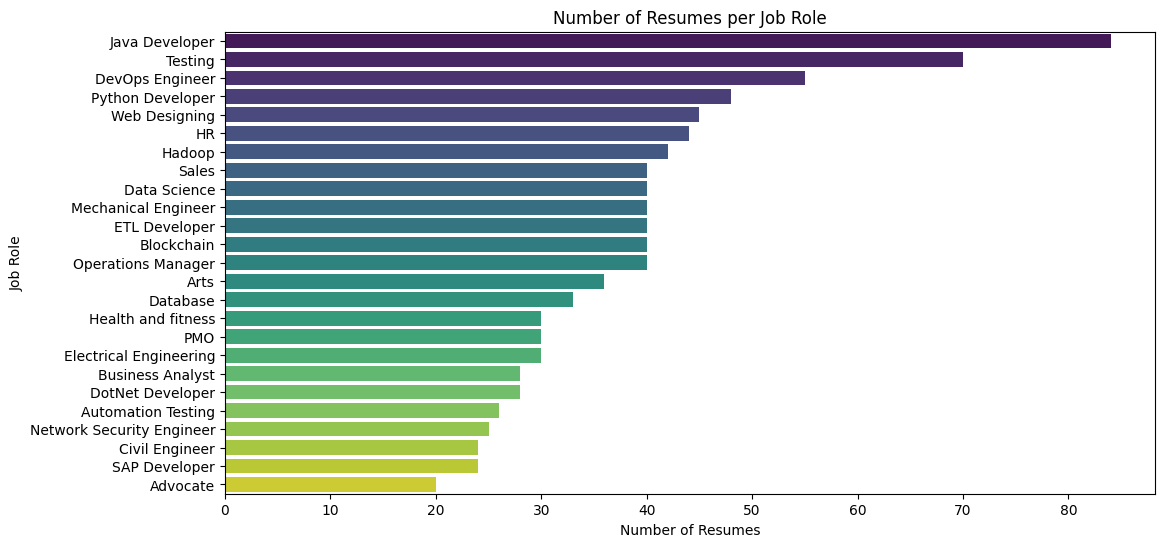

In [40]:
plt.figure(figsize=(12,6))
role_counts = df['Category'].value_counts()

sns.barplot(x=role_counts.values, y=role_counts.index, palette="viridis")
plt.title("Number of Resumes per Job Role")
plt.xlabel("Number of Resumes")
plt.ylabel("Job Role")
plt.show()


/tmp/ipython-input-1155474704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.index, y=top_roles.values, palette="coolwarm")


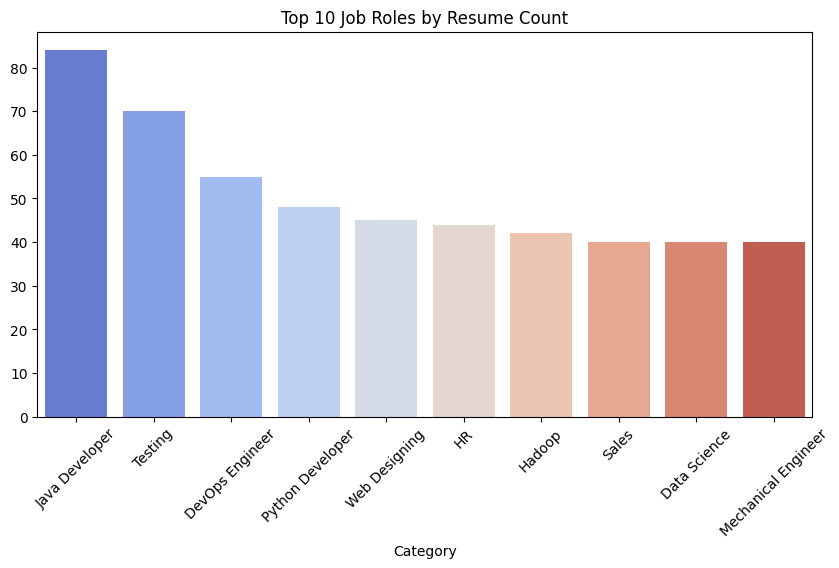

In [ ]:
top_roles = role_counts.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_roles.index, y=top_roles.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Job Roles by Resume Count")
plt.show()

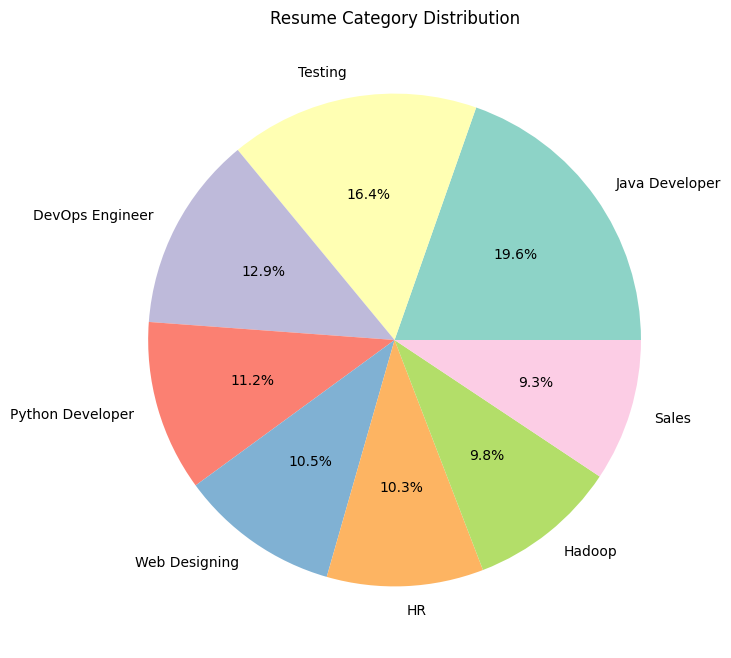

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(
    role_counts.head(8),
    labels=role_counts.head(8).index,
    autopct='%1.1f%%',
    colors=sns.color_palette("Set3")
)
plt.title("Resume Category Distribution")
plt.show()

## Feature Extraction using TF-IDF


In [43]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['cleaned_resume'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    trained[name] = model
    accuracy[name] = acc
    print(name, "Accuracy:", round(acc*100, 2), "%")


Logistic Regression Accuracy: 99.48 %
Naive Bayes Accuracy: 98.96 %
Linear SVM Accuracy: 99.48 %


In [45]:
# 🔐 Fix model selection (explicit & safe)
best_model = trained["Logistic Regression"]

print("TF-IDF features:", X.shape[1])
print("Model expects:", best_model.coef_.shape[1])


TF-IDF features: 3000
Model expects: 3000


In [46]:
# 🔐 Fix model selection (explicit & safe)
best_model = trained["Logistic Regression"]

print("TF-IDF features:", X.shape[1])
print("Model expects:", best_model.coef_.shape[1])


TF-IDF features: 3000
Model expects: 3000


In [47]:
import pickle

# 🔍 final safety check
assert X.shape[1] == best_model.coef_.shape[1] == 3000

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("✅ Model, TF-IDF, and LabelEncoder saved correctly")


✅ Model, TF-IDF, and LabelEncoder saved correctly


## Resume Prediction and ATS Analysis


In [48]:
best_model = trained[max(accuracy, key=accuracy.get)]

RESUME_TEXT = """John Doe
Email: john.doe@example.com
 | Phone: +91 9876543210

Professional Summary:
QA Engineer with 3+ years of experience in manual and automated testing, defect tracking, and ensuring software quality.

Skills:

Selenium, JIRA, Postman, UFT

Manual & Automation Testing, Regression & API Testing

passython, java, MySQL, Git

Experience:
QA Engineer | XYZ Technologies | Jan 2022 – Present

Created and executed automated test scripts.

Performed manual testing and reported bugs.

Collaborated with developers to ensure timely defect resolution.

Education:"""
TARGET_SKILLS = ['Python', 'SQL', 'Machine Learning', 'TensorFlow', 'Tableau']

vec = tfidf.transform([clean_text(RESUME_TEXT)])
probs = best_model.predict_proba(vec)[0]

top3 = probs.argsort()[-3:][::-1]

print("Top Job Role Predictions:")
for i in top3:
    print(le.inverse_transform([i])[0], ":", round(probs[i]*100,2), "%")

matched, missing, typos = get_insights(RESUME_TEXT, TARGET_SKILLS)

print("\nMatched Skills:", matched)
print("Missing Skills:", missing)
print("Spelling Errors:", typos)
print("Experience Level:", detect_experience(RESUME_TEXT))


Top Job Role Predictions:
Automation Testing : 17.86 %
Testing : 14.88 %
Java Developer : 6.0 %

Matched Skills: ['SQL']
Missing Skills: ['Python', 'Machine Learning', 'TensorFlow', 'Tableau']
Spelling Errors: ['automated', 'developers', 'postman', 'doe', 'qa', 'com', 'passython', 'resolution', 'scripts', 'mysql', 'git', 'selenium', 'java', 'quality', 'example', 'email', 'tracking', '3', '91', 'created', 'summary', 'education', 'phone', 'regression', 'bugs', 'skills', 'jan', 'jira']
Experience Level: Mid-Level


In [49]:
RESUME_TEXT = """
Jane Smith
Email: jane.smith@example.com | Phone: +91 9876543211

Professional Summary:
Front-end and full-stack web developer with 4+ years of experience building responsive websites and web applications. Skilled in JavaScript frameworks, UI/UX design, and backend integration.

Skills:
HTML, CSS, JavaScript, React, Node.js, Express, MongoDB, MySQL, Git, REST APIs, Python

Experience:
Web Developer | ABC Solutions | Feb 2020 – Present
- Developed responsive web applications using React and Node.js.
- Designed RESTful APIs and integrated with frontend components.
- Collaborated with designers and QA engineers to deliver user-friendly web apps.

Education:
B.Tech in Information Technology | XYZ University | 2015 – 2019
"""

TARGET_SKILLS = ['HTML', 'CSS', 'JavaScript', 'React', 'Node.js', 'Python', 'Django', 'Flask', 'MongoDB', 'SQL']


In [50]:
vec = tfidf.transform([clean_text(RESUME_TEXT)])
probs = best_model.predict_proba(vec)[0]

top3 = probs.argsort()[-3:][::-1]

print("Top Job Role Predictions:")
for i in top3:
    print(le.inverse_transform([i])[0], ":", round(probs[i]*100,2), "%")

matched, missing, typos = get_insights(RESUME_TEXT, TARGET_SKILLS)

print("\nMatched Skills:", matched)
print("Missing Skills:", missing)
print("Spelling Errors:", typos)
print("Experience Level:", detect_experience(RESUME_TEXT))


Top Job Role Predictions:
Web Designing : 11.64 %
Java Developer : 10.19 %
Python Developer : 8.07 %

Matched Skills: ['HTML', 'CSS', 'JavaScript', 'React', 'Node.js', 'Python', 'MongoDB', 'SQL']
Missing Skills: ['Django', 'Flask']
Spelling Errors: ['design', 'ui', 'components', 'qa', 'js', 'backend', 'skilled', 'com', 'designers', 'frontend', 'mongodb', 'end', 'integration', 'user', 'full', 'jane', 'tech', 'frameworks', 'mysql', 'git', 'b', 'stack', 'html', 'node', 'express', 'friendly', 'example', 'css', '4', 'email', '91', 'ux', 'summary', 'education', 'websites', 'phone', 'feb', 'skills', 'front', 'apps']
Experience Level: Mid-Level


In [51]:
RESUME_TEXT = """
Alex Kumar
Email: alex.kumar@example.com | Phone: +91 9876543212

Professional Summary:
Data Scientist with 3+ years of experience in machine learning, data analysis, and predictive modeling. Proficient in Python, R, SQL, and data visualization.

Skills:
Python, R, SQL, Pandas, NumPy, Scikit-learn, TensorFlow, Matplotlib, Seaborn, Tableau, Git

Experience:
Data Scientist | DataTech Solutions | Mar 2021 – Present
- Built predictive models using Scikit-learn and TensorFlow.
- Analyzed large datasets to extract actionable insights.
- Created interactive dashboards with Tableau and Matplotlib.

Education:
M.Tech in Data Science | XYZ University | 2018 – 2020
B.Tech in Computer Science | ABC University | 2014 – 2018
"""

TARGET_SKILLS = ['Python', 'R', 'SQL', 'TensorFlow', 'Scikit-learn', 'Pandas', 'NumPy', 'Tableau', 'PowerBI']


In [52]:
vec = tfidf.transform([clean_text(RESUME_TEXT)])
probs = best_model.predict_proba(vec)[0]

top3 = probs.argsort()[-3:][::-1]

print("Top Job Role Predictions:")
for i in top3:
    print(le.inverse_transform([i])[0], ":", round(probs[i]*100,2), "%")

matched, missing, typos = get_insights(RESUME_TEXT, TARGET_SKILLS)

print("\nMatched Skills:", matched)
print("Missing Skills:", missing)
print("Spelling Errors:", typos)
print("Experience Level:", detect_experience(RESUME_TEXT))


Top Job Role Predictions:
Data Science : 36.9 %
Python Developer : 5.29 %
Hadoop : 3.72 %

Matched Skills: ['Python', 'R', 'SQL', 'TensorFlow', 'Scikit-learn', 'Pandas', 'NumPy', 'Tableau']
Missing Skills: ['PowerBI']
Spelling Errors: ['kumar', 'alex', 'pandas', 'analysis', 'com', 'r', 'predictive', 'seaborn', 'numpy', 'visualization', 'tech', 'python', 'git', 'learning', 'b', 'sql', 'm', 'tensorflow', 'tableau', 'example', 'email', 'matplotlib', '3', '91', 'created', 'dashboards', 'learn', 'summary', 'education', 'insights', 'phone', 'mar', 'scikit', 'skills', 'modeling']
Experience Level: Mid-Level


In [53]:
print("TF-IDF features:", X.shape[1])
print("Model expects:", best_model.coef_.shape[1])


TF-IDF features: 3000
Model expects: 3000
